In [1]:
import pandas as pd
import warnings
import cnn_loop
import os

from processing import preprocessing

warnings.filterwarnings("ignore")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
data_df = preprocessing.load_dataset(num_samples=500)

0.00 of data loaded


In [3]:
data_df = pd.read_json('/datasets/UrbanSound8K/processed/mean_mfcc_data.json')
data_df = preprocessing.filter_mfccs(data_df)

In [4]:
X_train, X_test, y_train, y_test = preprocessing.create_training_data(data_df)

In [5]:
num_outputs = data_df['label'].unique().shape[0]  # labels = 10

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("num_outputs: ", num_outputs)

X_train shape: (5861, 40, 173, 1)
X_test shape: (1466, 40, 173, 1)
y_train shape: (5861, 10)
y_test shape: (1466, 10)
num_outputs:  10


In [6]:
model = cnn_loop.CNN(num_outputs, num_models=4, DP_rate=0.1)

In [7]:
model.build_model()

{'model_1': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f1cfab571d0>,
 'model_2': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f1cfabc8908>,
 'model_3': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f1cfabbb4e0>,
 'model_4': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f1cfabaf5c0>}

In [8]:
model.initialize(X_test, y_test)

 SUMMARY FOR MODEL  1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 39, 172, 16)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 86, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 19, 86, 16)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                170       
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________
46/46 [==============================] - 0s 3ms/step - loss: 5.6375 - accuracy: 0.1508
Pre-training ac

In [9]:
histories, durations = model.train(X_train, X_test, y_train, y_test, num_epochs=500, batch_size=256)

Training for model  1  has started.
Epoch 1/500
23/23 [==============================] - ETA: 0s - loss: 4.0629 - accuracy: 0.1580
Epoch 00001: val_loss improved from inf to 3.09715, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 18ms/step - loss: 4.0629 - accuracy: 0.1580 - val_loss: 3.0971 - val_accuracy: 0.1733
Epoch 2/500
21/23 [==========================>...] - ETA: 0s - loss: 2.5924 - accuracy: 0.1616
Epoch 00002: val_loss improved from 3.09715 to 2.27010, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 2.5666 - accuracy: 0.1638 - val_loss: 2.2701 - val_accuracy: 0.1937
Epoch 3/500
22/23 [===========================>..] - ETA: 0s - loss: 2.1765 - accuracy: 0.1950
Epoch 00003: val_loss improved from 2.27010 to 2.13745, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 14ms/step - loss: 2.1782 - accu

21/23 [==========================>...] - ETA: 0s - loss: 1.7851 - accuracy: 0.3317
Epoch 00025: val_loss improved from 1.84252 to 1.83284, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 14ms/step - loss: 1.7861 - accuracy: 0.3336 - val_loss: 1.8328 - val_accuracy: 0.3070
Epoch 26/500
21/23 [==========================>...] - ETA: 0s - loss: 1.7875 - accuracy: 0.3268
Epoch 00026: val_loss did not improve from 1.83284
23/23 [==============================] - 0s 13ms/step - loss: 1.7818 - accuracy: 0.3276 - val_loss: 1.8349 - val_accuracy: 0.2913
Epoch 27/500
18/23 [======================>.......] - ETA: 0s - loss: 1.7736 - accuracy: 0.3364
Epoch 00027: val_loss improved from 1.83284 to 1.82845, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.7746 - accuracy: 0.3404 - val_loss: 1.8284 - val_accuracy: 0.2940
Epoch 28/500
21/23 [==========================>...] 

23/23 [==============================] - 0s 14ms/step - loss: 1.7317 - accuracy: 0.3602 - val_loss: 1.7770 - val_accuracy: 0.3315
Epoch 51/500
22/23 [===========================>..] - ETA: 0s - loss: 1.7320 - accuracy: 0.3638
Epoch 00051: val_loss did not improve from 1.77697
23/23 [==============================] - 0s 13ms/step - loss: 1.7306 - accuracy: 0.3634 - val_loss: 1.7776 - val_accuracy: 0.3199
Epoch 52/500
21/23 [==========================>...] - ETA: 0s - loss: 1.7317 - accuracy: 0.3575
Epoch 00052: val_loss improved from 1.77697 to 1.77389, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 14ms/step - loss: 1.7301 - accuracy: 0.3583 - val_loss: 1.7739 - val_accuracy: 0.3349
Epoch 53/500
22/23 [===========================>..] - ETA: 0s - loss: 1.7219 - accuracy: 0.3659
Epoch 00053: val_loss did not improve from 1.77389
23/23 [==============================] - 0s 12ms/step - loss: 1.7278 - accuracy: 0.3631 - val_loss: 1.77

21/23 [==========================>...] - ETA: 0s - loss: 1.7019 - accuracy: 0.3770
Epoch 00077: val_loss did not improve from 1.74094
23/23 [==============================] - 0s 13ms/step - loss: 1.7007 - accuracy: 0.3762 - val_loss: 1.7459 - val_accuracy: 0.3383
Epoch 78/500
21/23 [==========================>...] - ETA: 0s - loss: 1.6953 - accuracy: 0.3795
Epoch 00078: val_loss improved from 1.74094 to 1.73543, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 14ms/step - loss: 1.6968 - accuracy: 0.3769 - val_loss: 1.7354 - val_accuracy: 0.3561
Epoch 79/500
22/23 [===========================>..] - ETA: 0s - loss: 1.6966 - accuracy: 0.3754
Epoch 00079: val_loss did not improve from 1.73543
23/23 [==============================] - 0s 13ms/step - loss: 1.6950 - accuracy: 0.3774 - val_loss: 1.7380 - val_accuracy: 0.3486
Epoch 80/500
21/23 [==========================>...] - ETA: 0s - loss: 1.6944 - accuracy: 0.3750
Epoch 00080: val_loss

Epoch 104/500
21/23 [==========================>...] - ETA: 0s - loss: 1.6729 - accuracy: 0.3873
Epoch 00104: val_loss did not improve from 1.70512
23/23 [==============================] - 0s 13ms/step - loss: 1.6704 - accuracy: 0.3866 - val_loss: 1.7108 - val_accuracy: 0.3683
Epoch 105/500
21/23 [==========================>...] - ETA: 0s - loss: 1.6655 - accuracy: 0.3908
Epoch 00105: val_loss did not improve from 1.70512
23/23 [==============================] - 0s 13ms/step - loss: 1.6687 - accuracy: 0.3911 - val_loss: 1.7054 - val_accuracy: 0.3588
Epoch 106/500
21/23 [==========================>...] - ETA: 0s - loss: 1.6660 - accuracy: 0.3955
Epoch 00106: val_loss did not improve from 1.70512
23/23 [==============================] - 0s 13ms/step - loss: 1.6657 - accuracy: 0.3919 - val_loss: 1.7100 - val_accuracy: 0.3568
Epoch 107/500
21/23 [==========================>...] - ETA: 0s - loss: 1.6640 - accuracy: 0.3932
Epoch 00107: val_loss improved from 1.70512 to 1.70495, saving model 

Epoch 131/500
22/23 [===========================>..] - ETA: 0s - loss: 1.6373 - accuracy: 0.3963
Epoch 00131: val_loss did not improve from 1.67152
23/23 [==============================] - 0s 12ms/step - loss: 1.6370 - accuracy: 0.3972 - val_loss: 1.6745 - val_accuracy: 0.3738
Epoch 132/500
22/23 [===========================>..] - ETA: 0s - loss: 1.6360 - accuracy: 0.4055
Epoch 00132: val_loss did not improve from 1.67152
23/23 [==============================] - 0s 13ms/step - loss: 1.6355 - accuracy: 0.4069 - val_loss: 1.6774 - val_accuracy: 0.3738
Epoch 133/500
21/23 [==========================>...] - ETA: 0s - loss: 1.6380 - accuracy: 0.4057
Epoch 00133: val_loss did not improve from 1.67152
23/23 [==============================] - 0s 13ms/step - loss: 1.6396 - accuracy: 0.4047 - val_loss: 1.6731 - val_accuracy: 0.3868
Epoch 134/500
21/23 [==========================>...] - ETA: 0s - loss: 1.6467 - accuracy: 0.3977
Epoch 00134: val_loss improved from 1.67152 to 1.66817, saving model 

21/23 [==========================>...] - ETA: 0s - loss: 1.6057 - accuracy: 0.4202
Epoch 00158: val_loss improved from 1.64249 to 1.63914, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 14ms/step - loss: 1.6037 - accuracy: 0.4194 - val_loss: 1.6391 - val_accuracy: 0.3984
Epoch 159/500
22/23 [===========================>..] - ETA: 0s - loss: 1.6006 - accuracy: 0.4302
Epoch 00159: val_loss did not improve from 1.63914
23/23 [==============================] - 0s 13ms/step - loss: 1.6011 - accuracy: 0.4284 - val_loss: 1.6401 - val_accuracy: 0.3956
Epoch 160/500
22/23 [===========================>..] - ETA: 0s - loss: 1.5996 - accuracy: 0.4171
Epoch 00160: val_loss improved from 1.63914 to 1.63662, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.6011 - accuracy: 0.4160 - val_loss: 1.6366 - val_accuracy: 0.4011
Epoch 161/500
22/23 [===========================>.

23/23 [==============================] - ETA: 0s - loss: 1.5720 - accuracy: 0.4289
Epoch 00184: val_loss improved from 1.61344 to 1.61206, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.5720 - accuracy: 0.4289 - val_loss: 1.6121 - val_accuracy: 0.4031
Epoch 185/500
23/23 [==============================] - ETA: 0s - loss: 1.5695 - accuracy: 0.4417
Epoch 00185: val_loss improved from 1.61206 to 1.61001, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.5695 - accuracy: 0.4417 - val_loss: 1.6100 - val_accuracy: 0.4038
Epoch 186/500
22/23 [===========================>..] - ETA: 0s - loss: 1.5687 - accuracy: 0.4363
Epoch 00186: val_loss improved from 1.61001 to 1.60979, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 14ms/step - loss: 1.5691 - accuracy: 0.4349 - val_loss: 1.6098 - val_ac

22/23 [===========================>..] - ETA: 0s - loss: 1.5448 - accuracy: 0.4432
Epoch 00210: val_loss did not improve from 1.58151
23/23 [==============================] - 0s 13ms/step - loss: 1.5415 - accuracy: 0.4445 - val_loss: 1.5884 - val_accuracy: 0.4243
Epoch 211/500
21/23 [==========================>...] - ETA: 0s - loss: 1.5419 - accuracy: 0.4513
Epoch 00211: val_loss did not improve from 1.58151
23/23 [==============================] - 0s 13ms/step - loss: 1.5397 - accuracy: 0.4511 - val_loss: 1.5815 - val_accuracy: 0.4175
Epoch 212/500
19/23 [=======================>......] - ETA: 0s - loss: 1.5292 - accuracy: 0.4478
Epoch 00212: val_loss did not improve from 1.58151
23/23 [==============================] - 0s 12ms/step - loss: 1.5387 - accuracy: 0.4453 - val_loss: 1.5839 - val_accuracy: 0.4031
Epoch 213/500
22/23 [===========================>..] - ETA: 0s - loss: 1.5376 - accuracy: 0.4513
Epoch 00213: val_loss improved from 1.58151 to 1.58117, saving model to models/save

21/23 [==========================>...] - ETA: 0s - loss: 1.5105 - accuracy: 0.4591
Epoch 00237: val_loss did not improve from 1.55423
23/23 [==============================] - 0s 13ms/step - loss: 1.5110 - accuracy: 0.4607 - val_loss: 1.5547 - val_accuracy: 0.4229
Epoch 238/500
21/23 [==========================>...] - ETA: 0s - loss: 1.5131 - accuracy: 0.4609
Epoch 00238: val_loss improved from 1.55423 to 1.55377, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 14ms/step - loss: 1.5134 - accuracy: 0.4610 - val_loss: 1.5538 - val_accuracy: 0.4393
Epoch 239/500
23/23 [==============================] - ETA: 0s - loss: 1.5116 - accuracy: 0.4596
Epoch 00239: val_loss did not improve from 1.55377
23/23 [==============================] - 0s 12ms/step - loss: 1.5116 - accuracy: 0.4596 - val_loss: 1.5569 - val_accuracy: 0.4359
Epoch 240/500
19/23 [=======================>......] - ETA: 0s - loss: 1.5000 - accuracy: 0.4624
Epoch 00240: val_l

21/23 [==========================>...] - ETA: 0s - loss: 1.4939 - accuracy: 0.4732
Epoch 00264: val_loss did not improve from 1.53098
23/23 [==============================] - 0s 12ms/step - loss: 1.4879 - accuracy: 0.4735 - val_loss: 1.5348 - val_accuracy: 0.4304
Epoch 265/500
22/23 [===========================>..] - ETA: 0s - loss: 1.4847 - accuracy: 0.4732
Epoch 00265: val_loss did not improve from 1.53098
23/23 [==============================] - 0s 12ms/step - loss: 1.4838 - accuracy: 0.4743 - val_loss: 1.5386 - val_accuracy: 0.4475
Epoch 266/500
21/23 [==========================>...] - ETA: 0s - loss: 1.4874 - accuracy: 0.4779
Epoch 00266: val_loss improved from 1.53098 to 1.52976, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 14ms/step - loss: 1.4867 - accuracy: 0.4757 - val_loss: 1.5298 - val_accuracy: 0.4366
Epoch 267/500
18/23 [======================>.......] - ETA: 0s - loss: 1.4907 - accuracy: 0.4750
Epoch 00267: val_l

Epoch 292/500
21/23 [==========================>...] - ETA: 0s - loss: 1.4621 - accuracy: 0.4810
Epoch 00292: val_loss improved from 1.51322 to 1.51126, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 14ms/step - loss: 1.4695 - accuracy: 0.4813 - val_loss: 1.5113 - val_accuracy: 0.4604
Epoch 293/500
21/23 [==========================>...] - ETA: 0s - loss: 1.4711 - accuracy: 0.4831
Epoch 00293: val_loss improved from 1.51126 to 1.51017, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 14ms/step - loss: 1.4680 - accuracy: 0.4859 - val_loss: 1.5102 - val_accuracy: 0.4536
Epoch 294/500
22/23 [===========================>..] - ETA: 0s - loss: 1.4616 - accuracy: 0.4890
Epoch 00294: val_loss improved from 1.51017 to 1.50785, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 14ms/step - loss: 1.4623 - accuracy: 0.4888 - val_loss: 1

Epoch 319/500
21/23 [==========================>...] - ETA: 0s - loss: 1.4491 - accuracy: 0.4980
Epoch 00319: val_loss improved from 1.49480 to 1.49110, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 14ms/step - loss: 1.4513 - accuracy: 0.4972 - val_loss: 1.4911 - val_accuracy: 0.4604
Epoch 320/500
21/23 [==========================>...] - ETA: 0s - loss: 1.4451 - accuracy: 0.4948
Epoch 00320: val_loss improved from 1.49110 to 1.49051, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 14ms/step - loss: 1.4499 - accuracy: 0.4934 - val_loss: 1.4905 - val_accuracy: 0.4516
Epoch 321/500
21/23 [==========================>...] - ETA: 0s - loss: 1.4521 - accuracy: 0.4903
Epoch 00321: val_loss did not improve from 1.49051
23/23 [==============================] - 0s 13ms/step - loss: 1.4542 - accuracy: 0.4868 - val_loss: 1.4948 - val_accuracy: 0.4618
Epoch 322/500
21/23 [===============

Epoch 347/500
21/23 [==========================>...] - ETA: 0s - loss: 1.4280 - accuracy: 0.5050
Epoch 00347: val_loss did not improve from 1.47898
23/23 [==============================] - 0s 13ms/step - loss: 1.4334 - accuracy: 0.5006 - val_loss: 1.4823 - val_accuracy: 0.4761
Epoch 348/500
21/23 [==========================>...] - ETA: 0s - loss: 1.4323 - accuracy: 0.4994
Epoch 00348: val_loss did not improve from 1.47898
23/23 [==============================] - 0s 13ms/step - loss: 1.4339 - accuracy: 0.4946 - val_loss: 1.4790 - val_accuracy: 0.4495
Epoch 349/500
21/23 [==========================>...] - ETA: 0s - loss: 1.4334 - accuracy: 0.4944
Epoch 00349: val_loss did not improve from 1.47898
23/23 [==============================] - 0s 13ms/step - loss: 1.4359 - accuracy: 0.4936 - val_loss: 1.4792 - val_accuracy: 0.4598
Epoch 350/500
21/23 [==========================>...] - ETA: 0s - loss: 1.4362 - accuracy: 0.4970
Epoch 00350: val_loss did not improve from 1.47898
23/23 [===========

Epoch 375/500
21/23 [==========================>...] - ETA: 0s - loss: 1.4230 - accuracy: 0.5002
Epoch 00375: val_loss did not improve from 1.46216
23/23 [==============================] - 0s 14ms/step - loss: 1.4225 - accuracy: 0.5003 - val_loss: 1.4697 - val_accuracy: 0.4638
Epoch 376/500
21/23 [==========================>...] - ETA: 0s - loss: 1.4238 - accuracy: 0.5061
Epoch 00376: val_loss did not improve from 1.46216
23/23 [==============================] - 0s 13ms/step - loss: 1.4228 - accuracy: 0.5054 - val_loss: 1.4690 - val_accuracy: 0.4809
Epoch 377/500
21/23 [==========================>...] - ETA: 0s - loss: 1.4301 - accuracy: 0.4968
Epoch 00377: val_loss did not improve from 1.46216
23/23 [==============================] - 0s 13ms/step - loss: 1.4244 - accuracy: 0.5018 - val_loss: 1.4644 - val_accuracy: 0.4611
Epoch 378/500
23/23 [==============================] - ETA: 0s - loss: 1.4207 - accuracy: 0.5025
Epoch 00378: val_loss improved from 1.46216 to 1.46083, saving model 

21/23 [==========================>...] - ETA: 0s - loss: 1.4128 - accuracy: 0.5058
Epoch 00403: val_loss did not improve from 1.45356
23/23 [==============================] - 0s 13ms/step - loss: 1.4131 - accuracy: 0.5084 - val_loss: 1.4588 - val_accuracy: 0.4632
Epoch 404/500
21/23 [==========================>...] - ETA: 0s - loss: 1.3986 - accuracy: 0.5143
Epoch 00404: val_loss did not improve from 1.45356
23/23 [==============================] - 0s 13ms/step - loss: 1.4070 - accuracy: 0.5108 - val_loss: 1.4625 - val_accuracy: 0.4707
Epoch 405/500
21/23 [==========================>...] - ETA: 0s - loss: 1.4087 - accuracy: 0.5054
Epoch 00405: val_loss did not improve from 1.45356
23/23 [==============================] - 0s 12ms/step - loss: 1.4123 - accuracy: 0.5038 - val_loss: 1.4547 - val_accuracy: 0.4734
Epoch 406/500
18/23 [======================>.......] - ETA: 0s - loss: 1.4113 - accuracy: 0.5000
Epoch 00406: val_loss improved from 1.45356 to 1.45351, saving model to models/save

Epoch 432/500
21/23 [==========================>...] - ETA: 0s - loss: 1.3999 - accuracy: 0.5143
Epoch 00432: val_loss improved from 1.44427 to 1.44360, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 14ms/step - loss: 1.3985 - accuracy: 0.5154 - val_loss: 1.4436 - val_accuracy: 0.4857
Epoch 433/500
21/23 [==========================>...] - ETA: 0s - loss: 1.3985 - accuracy: 0.5113
Epoch 00433: val_loss did not improve from 1.44360
23/23 [==============================] - 0s 13ms/step - loss: 1.4009 - accuracy: 0.5093 - val_loss: 1.4503 - val_accuracy: 0.4686
Epoch 434/500
18/23 [======================>.......] - ETA: 0s - loss: 1.4005 - accuracy: 0.5167
Epoch 00434: val_loss did not improve from 1.44360
23/23 [==============================] - 0s 12ms/step - loss: 1.4012 - accuracy: 0.5142 - val_loss: 1.4471 - val_accuracy: 0.4754
Epoch 435/500
21/23 [==========================>...] - ETA: 0s - loss: 1.3984 - accuracy: 0.5123
Epoc

21/23 [==========================>...] - ETA: 0s - loss: 1.3876 - accuracy: 0.5167
Epoch 00460: val_loss did not improve from 1.43397
23/23 [==============================] - 0s 13ms/step - loss: 1.3913 - accuracy: 0.5161 - val_loss: 1.4342 - val_accuracy: 0.4864
Epoch 461/500
21/23 [==========================>...] - ETA: 0s - loss: 1.3911 - accuracy: 0.5141
Epoch 00461: val_loss improved from 1.43397 to 1.43217, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 14ms/step - loss: 1.3929 - accuracy: 0.5125 - val_loss: 1.4322 - val_accuracy: 0.4870
Epoch 462/500
18/23 [======================>.......] - ETA: 0s - loss: 1.3899 - accuracy: 0.5158
Epoch 00462: val_loss did not improve from 1.43217
23/23 [==============================] - 0s 12ms/step - loss: 1.3871 - accuracy: 0.5165 - val_loss: 1.4391 - val_accuracy: 0.4870
Epoch 463/500
23/23 [==============================] - ETA: 0s - loss: 1.3941 - accuracy: 0.5216
Epoch 00463: val_l

21/23 [==========================>...] - ETA: 0s - loss: 1.3804 - accuracy: 0.5201
Epoch 00488: val_loss improved from 1.42433 to 1.42310, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 14ms/step - loss: 1.3814 - accuracy: 0.5189 - val_loss: 1.4231 - val_accuracy: 0.4877
Epoch 489/500
21/23 [==========================>...] - ETA: 0s - loss: 1.3843 - accuracy: 0.5229
Epoch 00489: val_loss did not improve from 1.42310
23/23 [==============================] - 0s 13ms/step - loss: 1.3831 - accuracy: 0.5211 - val_loss: 1.4288 - val_accuracy: 0.4809
Epoch 490/500
22/23 [===========================>..] - ETA: 0s - loss: 1.3841 - accuracy: 0.5195
Epoch 00490: val_loss improved from 1.42310 to 1.42162, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.3822 - accuracy: 0.5204 - val_loss: 1.4216 - val_accuracy: 0.4952
Epoch 491/500
23/23 [=============================

Epoch 14/500
21/23 [==========================>...] - ETA: 0s - loss: 1.2880 - accuracy: 0.5246
Epoch 00014: val_loss improved from 1.31960 to 1.30283, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 18ms/step - loss: 1.2866 - accuracy: 0.5236 - val_loss: 1.3028 - val_accuracy: 0.5300
Epoch 15/500
22/23 [===========================>..] - ETA: 0s - loss: 1.2759 - accuracy: 0.5304
Epoch 00015: val_loss improved from 1.30283 to 1.28639, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 17ms/step - loss: 1.2721 - accuracy: 0.5335 - val_loss: 1.2864 - val_accuracy: 0.5423
Epoch 16/500
23/23 [==============================] - ETA: 0s - loss: 1.2495 - accuracy: 0.5444
Epoch 00016: val_loss improved from 1.28639 to 1.26113, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 17ms/step - loss: 1.2495 - accuracy: 0.5444 - val_loss: 1.26

23/23 [==============================] - ETA: 0s - loss: 1.0724 - accuracy: 0.6243
Epoch 00039: val_loss improved from 1.09702 to 1.07761, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 17ms/step - loss: 1.0724 - accuracy: 0.6243 - val_loss: 1.0776 - val_accuracy: 0.6228
Epoch 40/500
22/23 [===========================>..] - ETA: 0s - loss: 1.0584 - accuracy: 0.6346
Epoch 00040: val_loss did not improve from 1.07761
23/23 [==============================] - 0s 16ms/step - loss: 1.0573 - accuracy: 0.6347 - val_loss: 1.0865 - val_accuracy: 0.6289
Epoch 41/500
21/23 [==========================>...] - ETA: 0s - loss: 1.0494 - accuracy: 0.6356
Epoch 00041: val_loss did not improve from 1.07761
23/23 [==============================] - 0s 15ms/step - loss: 1.0541 - accuracy: 0.6327 - val_loss: 1.0954 - val_accuracy: 0.6276
Epoch 42/500
21/23 [==========================>...] - ETA: 0s - loss: 1.0555 - accuracy: 0.6321
Epoch 00042: val_loss

22/23 [===========================>..] - ETA: 0s - loss: 0.9577 - accuracy: 0.6694
Epoch 00066: val_loss improved from 0.98518 to 0.98333, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 17ms/step - loss: 0.9598 - accuracy: 0.6690 - val_loss: 0.9833 - val_accuracy: 0.6692
Epoch 67/500
22/23 [===========================>..] - ETA: 0s - loss: 0.9533 - accuracy: 0.6651
Epoch 00067: val_loss did not improve from 0.98333
23/23 [==============================] - 0s 15ms/step - loss: 0.9525 - accuracy: 0.6670 - val_loss: 0.9977 - val_accuracy: 0.6726
Epoch 68/500
21/23 [==========================>...] - ETA: 0s - loss: 0.9466 - accuracy: 0.6749
Epoch 00068: val_loss did not improve from 0.98333
23/23 [==============================] - 0s 15ms/step - loss: 0.9482 - accuracy: 0.6728 - val_loss: 1.0308 - val_accuracy: 0.6569
Epoch 69/500
21/23 [==========================>...] - ETA: 0s - loss: 0.9569 - accuracy: 0.6702
Epoch 00069: val_loss

Epoch 94/500
21/23 [==========================>...] - ETA: 0s - loss: 0.8894 - accuracy: 0.6929
Epoch 00094: val_loss did not improve from 0.92576
23/23 [==============================] - 0s 15ms/step - loss: 0.8879 - accuracy: 0.6907 - val_loss: 0.9451 - val_accuracy: 0.6849
Epoch 95/500
21/23 [==========================>...] - ETA: 0s - loss: 0.8741 - accuracy: 0.6948
Epoch 00095: val_loss did not improve from 0.92576
23/23 [==============================] - 0s 16ms/step - loss: 0.8809 - accuracy: 0.6937 - val_loss: 0.9299 - val_accuracy: 0.7026
Epoch 96/500
21/23 [==========================>...] - ETA: 0s - loss: 0.8861 - accuracy: 0.7015
Epoch 00096: val_loss did not improve from 0.92576
23/23 [==============================] - 0s 16ms/step - loss: 0.8863 - accuracy: 0.7002 - val_loss: 0.9329 - val_accuracy: 0.6876
Epoch 97/500
21/23 [==========================>...] - ETA: 0s - loss: 0.8910 - accuracy: 0.6923
Epoch 00097: val_loss improved from 0.92576 to 0.91944, saving model to m

22/23 [===========================>..] - ETA: 0s - loss: 0.8358 - accuracy: 0.7161
Epoch 00122: val_loss did not improve from 0.88745
23/23 [==============================] - 0s 16ms/step - loss: 0.8343 - accuracy: 0.7168 - val_loss: 0.8972 - val_accuracy: 0.6978
Epoch 123/500
20/23 [=========================>....] - ETA: 0s - loss: 0.8331 - accuracy: 0.7209
Epoch 00123: val_loss did not improve from 0.88745
23/23 [==============================] - 0s 15ms/step - loss: 0.8364 - accuracy: 0.7181 - val_loss: 0.8973 - val_accuracy: 0.7115
Epoch 124/500
21/23 [==========================>...] - ETA: 0s - loss: 0.8592 - accuracy: 0.7091
Epoch 00124: val_loss improved from 0.88745 to 0.87425, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 17ms/step - loss: 0.8508 - accuracy: 0.7130 - val_loss: 0.8743 - val_accuracy: 0.7053
Epoch 125/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8332 - accuracy: 0.7152
Epoch 00125: val_l

21/23 [==========================>...] - ETA: 0s - loss: 0.7960 - accuracy: 0.7329
Epoch 00150: val_loss improved from 0.84684 to 0.84427, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 17ms/step - loss: 0.7988 - accuracy: 0.7311 - val_loss: 0.8443 - val_accuracy: 0.7251
Epoch 151/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7931 - accuracy: 0.7264
Epoch 00151: val_loss improved from 0.84427 to 0.83446, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 17ms/step - loss: 0.7941 - accuracy: 0.7277 - val_loss: 0.8345 - val_accuracy: 0.7231
Epoch 152/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8007 - accuracy: 0.7179
Epoch 00152: val_loss did not improve from 0.83446
23/23 [==============================] - 0s 16ms/step - loss: 0.8001 - accuracy: 0.7205 - val_loss: 0.8545 - val_accuracy: 0.7101
Epoch 153/500
21/23 [==========================>..

Epoch 179/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7715 - accuracy: 0.7387
Epoch 00179: val_loss did not improve from 0.81949
23/23 [==============================] - 0s 16ms/step - loss: 0.7696 - accuracy: 0.7381 - val_loss: 0.8460 - val_accuracy: 0.7231
Epoch 180/500
23/23 [==============================] - ETA: 0s - loss: 0.7614 - accuracy: 0.7420
Epoch 00180: val_loss did not improve from 0.81949
23/23 [==============================] - 0s 16ms/step - loss: 0.7614 - accuracy: 0.7420 - val_loss: 0.8259 - val_accuracy: 0.7244
Epoch 181/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7664 - accuracy: 0.7483
Epoch 00181: val_loss did not improve from 0.81949
23/23 [==============================] - 0s 16ms/step - loss: 0.7704 - accuracy: 0.7466 - val_loss: 0.8291 - val_accuracy: 0.7149
Epoch 182/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7719 - accuracy: 0.7355
Epoch 00182: val_loss improved from 0.81949 to 0.80610, saving model 

Epoch 208/500
19/23 [=======================>......] - ETA: 0s - loss: 0.7486 - accuracy: 0.7414
Epoch 00208: val_loss did not improve from 0.80009
23/23 [==============================] - 0s 14ms/step - loss: 0.7489 - accuracy: 0.7463 - val_loss: 0.8180 - val_accuracy: 0.7265
Epoch 209/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7502 - accuracy: 0.7500
Epoch 00209: val_loss did not improve from 0.80009
23/23 [==============================] - 0s 16ms/step - loss: 0.7498 - accuracy: 0.7492 - val_loss: 0.8002 - val_accuracy: 0.7306
Epoch 210/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7456 - accuracy: 0.7496
Epoch 00210: val_loss did not improve from 0.80009
23/23 [==============================] - 0s 16ms/step - loss: 0.7444 - accuracy: 0.7485 - val_loss: 0.8096 - val_accuracy: 0.7196
Epoch 211/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7551 - accuracy: 0.7506
Epoch 00211: val_loss improved from 0.80009 to 0.79929, saving model 

Epoch 237/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7163 - accuracy: 0.7599
Epoch 00237: val_loss did not improve from 0.77384
23/23 [==============================] - 0s 16ms/step - loss: 0.7231 - accuracy: 0.7575 - val_loss: 0.7913 - val_accuracy: 0.7381
Epoch 238/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7253 - accuracy: 0.7608
Epoch 00238: val_loss did not improve from 0.77384
23/23 [==============================] - 0s 16ms/step - loss: 0.7277 - accuracy: 0.7603 - val_loss: 0.8041 - val_accuracy: 0.7196
Epoch 239/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7230 - accuracy: 0.7539
Epoch 00239: val_loss did not improve from 0.77384
23/23 [==============================] - 0s 16ms/step - loss: 0.7290 - accuracy: 0.7509 - val_loss: 0.7983 - val_accuracy: 0.7326
Epoch 240/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7296 - accuracy: 0.7576
Epoch 00240: val_loss did not improve from 0.77384
23/23 [===========

Epoch 266/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7046 - accuracy: 0.7623
Epoch 00266: val_loss did not improve from 0.76140
23/23 [==============================] - 0s 15ms/step - loss: 0.7049 - accuracy: 0.7623 - val_loss: 0.7681 - val_accuracy: 0.7408
Epoch 267/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7028 - accuracy: 0.7682
Epoch 00267: val_loss did not improve from 0.76140
23/23 [==============================] - 0s 17ms/step - loss: 0.7019 - accuracy: 0.7692 - val_loss: 0.7936 - val_accuracy: 0.7374
Epoch 268/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7052 - accuracy: 0.7619
Epoch 00268: val_loss did not improve from 0.76140
23/23 [==============================] - 0s 15ms/step - loss: 0.7002 - accuracy: 0.7632 - val_loss: 0.8057 - val_accuracy: 0.7333
Epoch 269/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7079 - accuracy: 0.7654
Epoch 00269: val_loss improved from 0.76140 to 0.75691, saving model 

Epoch 19/500
21/23 [==========================>...] - ETA: 0s - loss: 0.9783 - accuracy: 0.6570
Epoch 00019: val_loss did not improve from 1.02788
23/23 [==============================] - 0s 17ms/step - loss: 0.9732 - accuracy: 0.6606 - val_loss: 1.0651 - val_accuracy: 0.6310
Epoch 20/500
20/23 [=========================>....] - ETA: 0s - loss: 0.9529 - accuracy: 0.6707
Epoch 00020: val_loss improved from 1.02788 to 0.98757, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 20ms/step - loss: 0.9521 - accuracy: 0.6726 - val_loss: 0.9876 - val_accuracy: 0.6685
Epoch 21/500
21/23 [==========================>...] - ETA: 0s - loss: 0.9451 - accuracy: 0.6802
Epoch 00021: val_loss improved from 0.98757 to 0.96812, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 18ms/step - loss: 0.9459 - accuracy: 0.6796 - val_loss: 0.9681 - val_accuracy: 0.6821
Epoch 22/500
21/23 [===================

Epoch 46/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7267 - accuracy: 0.7537
Epoch 00046: val_loss improved from 0.79699 to 0.78848, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 19ms/step - loss: 0.7346 - accuracy: 0.7521 - val_loss: 0.7885 - val_accuracy: 0.7422
Epoch 47/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7326 - accuracy: 0.7509
Epoch 00047: val_loss did not improve from 0.78848
23/23 [==============================] - 0s 16ms/step - loss: 0.7314 - accuracy: 0.7521 - val_loss: 0.7885 - val_accuracy: 0.7428
Epoch 48/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7272 - accuracy: 0.7574
Epoch 00048: val_loss improved from 0.78848 to 0.78461, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 20ms/step - loss: 0.7237 - accuracy: 0.7591 - val_loss: 0.7846 - val_accuracy: 0.7435
Epoch 49/500
21/23 [===================

Epoch 73/500
21/23 [==========================>...] - ETA: 0s - loss: 0.5708 - accuracy: 0.8151
Epoch 00073: val_loss improved from 0.67065 to 0.63547, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 18ms/step - loss: 0.5779 - accuracy: 0.8127 - val_loss: 0.6355 - val_accuracy: 0.7899
Epoch 74/500
21/23 [==========================>...] - ETA: 0s - loss: 0.5779 - accuracy: 0.8071
Epoch 00074: val_loss did not improve from 0.63547
23/23 [==============================] - 0s 17ms/step - loss: 0.5825 - accuracy: 0.8052 - val_loss: 0.6538 - val_accuracy: 0.7858
Epoch 75/500
21/23 [==========================>...] - ETA: 0s - loss: 0.5714 - accuracy: 0.8093
Epoch 00075: val_loss did not improve from 0.63547
23/23 [==============================] - 0s 17ms/step - loss: 0.5680 - accuracy: 0.8110 - val_loss: 0.6534 - val_accuracy: 0.7865
Epoch 76/500
21/23 [==========================>...] - ETA: 0s - loss: 0.5661 - accuracy: 0.8132
Epoch 00

Epoch 101/500
21/23 [==========================>...] - ETA: 0s - loss: 0.4797 - accuracy: 0.8400
Epoch 00101: val_loss improved from 0.55284 to 0.54917, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 19ms/step - loss: 0.4747 - accuracy: 0.8417 - val_loss: 0.5492 - val_accuracy: 0.8124
Epoch 102/500
21/23 [==========================>...] - ETA: 0s - loss: 0.4836 - accuracy: 0.8382
Epoch 00102: val_loss did not improve from 0.54917
23/23 [==============================] - 0s 16ms/step - loss: 0.4858 - accuracy: 0.8371 - val_loss: 0.5671 - val_accuracy: 0.8117
Epoch 103/500
21/23 [==========================>...] - ETA: 0s - loss: 0.4772 - accuracy: 0.8395
Epoch 00103: val_loss improved from 0.54917 to 0.54302, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 19ms/step - loss: 0.4798 - accuracy: 0.8400 - val_loss: 0.5430 - val_accuracy: 0.8124
Epoch 104/500
22/23 [===============

21/23 [==========================>...] - ETA: 0s - loss: 0.4160 - accuracy: 0.8618
Epoch 00128: val_loss improved from 0.48992 to 0.48882, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 19ms/step - loss: 0.4149 - accuracy: 0.8616 - val_loss: 0.4888 - val_accuracy: 0.8336
Epoch 129/500
21/23 [==========================>...] - ETA: 0s - loss: 0.4230 - accuracy: 0.8504
Epoch 00129: val_loss did not improve from 0.48882
23/23 [==============================] - 0s 16ms/step - loss: 0.4242 - accuracy: 0.8505 - val_loss: 0.5220 - val_accuracy: 0.8247
Epoch 130/500
21/23 [==========================>...] - ETA: 0s - loss: 0.4143 - accuracy: 0.8605
Epoch 00130: val_loss did not improve from 0.48882
23/23 [==============================] - 0s 17ms/step - loss: 0.4156 - accuracy: 0.8613 - val_loss: 0.5096 - val_accuracy: 0.8267
Epoch 131/500
21/23 [==========================>...] - ETA: 0s - loss: 0.4150 - accuracy: 0.8622
Epoch 00131: val_l

Epoch 157/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3687 - accuracy: 0.8776
Epoch 00157: val_loss did not improve from 0.44856
23/23 [==============================] - 0s 17ms/step - loss: 0.3701 - accuracy: 0.8761 - val_loss: 0.4743 - val_accuracy: 0.8349
Epoch 158/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3609 - accuracy: 0.8776
Epoch 00158: val_loss did not improve from 0.44856
23/23 [==============================] - 0s 17ms/step - loss: 0.3590 - accuracy: 0.8782 - val_loss: 0.4669 - val_accuracy: 0.8445
Epoch 159/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3535 - accuracy: 0.8852
Epoch 00159: val_loss improved from 0.44856 to 0.44745, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 19ms/step - loss: 0.3544 - accuracy: 0.8852 - val_loss: 0.4475 - val_accuracy: 0.8554
Epoch 160/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3449 - accuracy: 0.8837
Epoc

21/23 [==========================>...] - ETA: 0s - loss: 0.3138 - accuracy: 0.8964
Epoch 00185: val_loss did not improve from 0.39821
23/23 [==============================] - 0s 17ms/step - loss: 0.3155 - accuracy: 0.8958 - val_loss: 0.4523 - val_accuracy: 0.8499
Epoch 186/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3137 - accuracy: 0.8904
Epoch 00186: val_loss did not improve from 0.39821
23/23 [==============================] - 0s 17ms/step - loss: 0.3164 - accuracy: 0.8894 - val_loss: 0.4152 - val_accuracy: 0.8643
Epoch 187/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3100 - accuracy: 0.8882
Epoch 00187: val_loss did not improve from 0.39821
23/23 [==============================] - 0s 17ms/step - loss: 0.3066 - accuracy: 0.8913 - val_loss: 0.4193 - val_accuracy: 0.8629
Epoch 188/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3140 - accuracy: 0.8973
Epoch 00188: val_loss did not improve from 0.39821
23/23 [=========================

21/23 [==========================>...] - ETA: 0s - loss: 0.2633 - accuracy: 0.9076
Epoch 00214: val_loss did not improve from 0.38702
23/23 [==============================] - 0s 16ms/step - loss: 0.2644 - accuracy: 0.9084 - val_loss: 0.3894 - val_accuracy: 0.8683
Epoch 215/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2722 - accuracy: 0.9089
Epoch 00215: val_loss did not improve from 0.38702
23/23 [==============================] - 0s 17ms/step - loss: 0.2708 - accuracy: 0.9094 - val_loss: 0.3964 - val_accuracy: 0.8690
Epoch 216/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2735 - accuracy: 0.9087
Epoch 00216: val_loss did not improve from 0.38702
23/23 [==============================] - 0s 17ms/step - loss: 0.2791 - accuracy: 0.9065 - val_loss: 0.3910 - val_accuracy: 0.8704
Epoch 217/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2817 - accuracy: 0.9014
Epoch 00217: val_loss improved from 0.38702 to 0.37509, saving model to models/save

Epoch 242/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2391 - accuracy: 0.9163
Epoch 00242: val_loss did not improve from 0.33755
23/23 [==============================] - 0s 17ms/step - loss: 0.2408 - accuracy: 0.9152 - val_loss: 0.3579 - val_accuracy: 0.8868
Epoch 243/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2503 - accuracy: 0.9154
Epoch 00243: val_loss did not improve from 0.33755
23/23 [==============================] - 0s 17ms/step - loss: 0.2489 - accuracy: 0.9159 - val_loss: 0.3729 - val_accuracy: 0.8847
Epoch 244/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2472 - accuracy: 0.9148
Epoch 00244: val_loss did not improve from 0.33755
23/23 [==============================] - 0s 17ms/step - loss: 0.2462 - accuracy: 0.9155 - val_loss: 0.3909 - val_accuracy: 0.8806
Epoch 245/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2413 - accuracy: 0.9178
Epoch 00245: val_loss did not improve from 0.33755
23/23 [===========

21/23 [==========================>...] - ETA: 0s - loss: 0.2105 - accuracy: 0.9276
Epoch 00271: val_loss did not improve from 0.33032
23/23 [==============================] - 0s 17ms/step - loss: 0.2131 - accuracy: 0.9273 - val_loss: 0.3628 - val_accuracy: 0.8854
Epoch 272/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2079 - accuracy: 0.9295
Epoch 00272: val_loss did not improve from 0.33032
23/23 [==============================] - 0s 16ms/step - loss: 0.2105 - accuracy: 0.9278 - val_loss: 0.3556 - val_accuracy: 0.8861
Epoch 273/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2082 - accuracy: 0.9278
Epoch 00273: val_loss did not improve from 0.33032
23/23 [==============================] - 0s 17ms/step - loss: 0.2082 - accuracy: 0.9287 - val_loss: 0.3491 - val_accuracy: 0.8909
Epoch 274/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2108 - accuracy: 0.9265
Epoch 00274: val_loss did not improve from 0.33032
23/23 [=========================

21/23 [==========================>...] - ETA: 0s - loss: 0.1940 - accuracy: 0.9284
Epoch 00300: val_loss did not improve from 0.31519
23/23 [==============================] - 0s 17ms/step - loss: 0.1904 - accuracy: 0.9304 - val_loss: 0.3336 - val_accuracy: 0.9031
Epoch 301/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1864 - accuracy: 0.9336
Epoch 00301: val_loss did not improve from 0.31519
23/23 [==============================] - 0s 16ms/step - loss: 0.1858 - accuracy: 0.9340 - val_loss: 0.3346 - val_accuracy: 0.8950
Epoch 302/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1868 - accuracy: 0.9332
Epoch 00302: val_loss did not improve from 0.31519
23/23 [==============================] - 0s 17ms/step - loss: 0.1897 - accuracy: 0.9309 - val_loss: 0.3169 - val_accuracy: 0.9100
Epoch 303/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1941 - accuracy: 0.9343
Epoch 00303: val_loss improved from 0.31519 to 0.31350, saving model to models/save

21/23 [==========================>...] - ETA: 0s - loss: 0.1676 - accuracy: 0.9436
Epoch 00329: val_loss improved from 0.30858 to 0.29506, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 18ms/step - loss: 0.1716 - accuracy: 0.9416 - val_loss: 0.2951 - val_accuracy: 0.9093
Epoch 330/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1864 - accuracy: 0.9340
Epoch 00330: val_loss did not improve from 0.29506
23/23 [==============================] - 0s 16ms/step - loss: 0.1859 - accuracy: 0.9335 - val_loss: 0.3163 - val_accuracy: 0.9038
Epoch 331/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1658 - accuracy: 0.9408
Epoch 00331: val_loss did not improve from 0.29506
23/23 [==============================] - 0s 17ms/step - loss: 0.1661 - accuracy: 0.9408 - val_loss: 0.3112 - val_accuracy: 0.9113
Epoch 332/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1651 - accuracy: 0.9410
Epoch 00332: val_l

Epoch 358/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1619 - accuracy: 0.9392
Epoch 00358: val_loss did not improve from 0.29016
23/23 [==============================] - 0s 17ms/step - loss: 0.1590 - accuracy: 0.9406 - val_loss: 0.3217 - val_accuracy: 0.9025
Epoch 359/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1511 - accuracy: 0.9490
Epoch 00359: val_loss did not improve from 0.29016
23/23 [==============================] - 0s 17ms/step - loss: 0.1580 - accuracy: 0.9468 - val_loss: 0.3113 - val_accuracy: 0.9072
Epoch 360/500
20/23 [=========================>....] - ETA: 0s - loss: 0.1574 - accuracy: 0.9434
Epoch 00360: val_loss did not improve from 0.29016
23/23 [==============================] - 0s 17ms/step - loss: 0.1599 - accuracy: 0.9422 - val_loss: 0.3371 - val_accuracy: 0.9045
Epoch 361/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1604 - accuracy: 0.9436
Epoch 00361: val_loss did not improve from 0.29016
23/23 [===========

Epoch 388/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1561 - accuracy: 0.9466
Epoch 00388: val_loss did not improve from 0.29016
23/23 [==============================] - 0s 16ms/step - loss: 0.1572 - accuracy: 0.9463 - val_loss: 0.3436 - val_accuracy: 0.9004
Epoch 389/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1485 - accuracy: 0.9468
Epoch 00389: val_loss did not improve from 0.29016
23/23 [==============================] - 0s 17ms/step - loss: 0.1480 - accuracy: 0.9474 - val_loss: 0.3445 - val_accuracy: 0.9031
Epoch 390/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1530 - accuracy: 0.9440
Epoch 00390: val_loss did not improve from 0.29016
23/23 [==============================] - 0s 17ms/step - loss: 0.1508 - accuracy: 0.9444 - val_loss: 0.3203 - val_accuracy: 0.9106
Epoch 391/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1392 - accuracy: 0.9513
Epoch 00391: val_loss did not improve from 0.29016
23/23 [===========

Epoch 418/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1381 - accuracy: 0.9505
Epoch 00418: val_loss did not improve from 0.29016
23/23 [==============================] - 0s 17ms/step - loss: 0.1352 - accuracy: 0.9515 - val_loss: 0.3322 - val_accuracy: 0.9065
Epoch 419/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1433 - accuracy: 0.9472
Epoch 00419: val_loss did not improve from 0.29016
23/23 [==============================] - 0s 17ms/step - loss: 0.1451 - accuracy: 0.9474 - val_loss: 0.3303 - val_accuracy: 0.9072
Epoch 420/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1354 - accuracy: 0.9511
Epoch 00420: val_loss did not improve from 0.29016
23/23 [==============================] - 0s 16ms/step - loss: 0.1364 - accuracy: 0.9514 - val_loss: 0.3330 - val_accuracy: 0.9120
Epoch 421/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1251 - accuracy: 0.9542
Epoch 00421: val_loss did not improve from 0.29016
23/23 [===========

21/23 [==========================>...] - ETA: 0s - loss: 1.6692 - accuracy: 0.3837
Epoch 00003: val_loss improved from 1.82242 to 1.61659, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 19ms/step - loss: 1.6642 - accuracy: 0.3878 - val_loss: 1.6166 - val_accuracy: 0.4325
Epoch 4/500
21/23 [==========================>...] - ETA: 0s - loss: 1.4685 - accuracy: 0.4795
Epoch 00004: val_loss improved from 1.61659 to 1.40310, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 20ms/step - loss: 1.4650 - accuracy: 0.4800 - val_loss: 1.4031 - val_accuracy: 0.5150
Epoch 5/500
21/23 [==========================>...] - ETA: 0s - loss: 1.3359 - accuracy: 0.5292
Epoch 00005: val_loss improved from 1.40310 to 1.26456, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 20ms/step - loss: 1.3386 - accuracy: 0.5305 - val_loss: 1.2646 - val_accura

23/23 [==============================] - 0s 19ms/step - loss: 0.5778 - accuracy: 0.8063 - val_loss: 0.6037 - val_accuracy: 0.7967
Epoch 28/500
21/23 [==========================>...] - ETA: 0s - loss: 0.5651 - accuracy: 0.8116
Epoch 00028: val_loss did not improve from 0.60373
23/23 [==============================] - 0s 17ms/step - loss: 0.5675 - accuracy: 0.8120 - val_loss: 0.6203 - val_accuracy: 0.7967
Epoch 29/500
21/23 [==========================>...] - ETA: 0s - loss: 0.5689 - accuracy: 0.8088
Epoch 00029: val_loss improved from 0.60373 to 0.59986, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 19ms/step - loss: 0.5671 - accuracy: 0.8106 - val_loss: 0.5999 - val_accuracy: 0.8063
Epoch 30/500
21/23 [==========================>...] - ETA: 0s - loss: 0.5303 - accuracy: 0.8198
Epoch 00030: val_loss improved from 0.59986 to 0.56098, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] 

23/23 [==============================] - 0s 21ms/step - loss: 0.3311 - accuracy: 0.8881 - val_loss: 0.3883 - val_accuracy: 0.8711
Epoch 54/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3212 - accuracy: 0.8890
Epoch 00054: val_loss did not improve from 0.38830
23/23 [==============================] - 0s 16ms/step - loss: 0.3201 - accuracy: 0.8884 - val_loss: 0.4036 - val_accuracy: 0.8629
Epoch 55/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3190 - accuracy: 0.8943
Epoch 00055: val_loss improved from 0.38830 to 0.37657, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 20ms/step - loss: 0.3175 - accuracy: 0.8944 - val_loss: 0.3766 - val_accuracy: 0.8799
Epoch 56/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3063 - accuracy: 0.8949
Epoch 00056: val_loss improved from 0.37657 to 0.35190, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] 

Epoch 82/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2179 - accuracy: 0.9235
Epoch 00082: val_loss improved from 0.30263 to 0.28800, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 20ms/step - loss: 0.2182 - accuracy: 0.9239 - val_loss: 0.2880 - val_accuracy: 0.9045
Epoch 83/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2103 - accuracy: 0.9273
Epoch 00083: val_loss did not improve from 0.28800
23/23 [==============================] - 0s 17ms/step - loss: 0.2103 - accuracy: 0.9268 - val_loss: 0.3301 - val_accuracy: 0.8943
Epoch 84/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2097 - accuracy: 0.9249
Epoch 00084: val_loss improved from 0.28800 to 0.28192, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 20ms/step - loss: 0.2091 - accuracy: 0.9258 - val_loss: 0.2819 - val_accuracy: 0.9072
Epoch 85/500
21/23 [===================

21/23 [==========================>...] - ETA: 0s - loss: 0.1467 - accuracy: 0.9461
Epoch 00110: val_loss did not improve from 0.25379
23/23 [==============================] - 0s 18ms/step - loss: 0.1510 - accuracy: 0.9456 - val_loss: 0.2730 - val_accuracy: 0.9202
Epoch 111/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1447 - accuracy: 0.9488
Epoch 00111: val_loss did not improve from 0.25379
23/23 [==============================] - 0s 17ms/step - loss: 0.1461 - accuracy: 0.9488 - val_loss: 0.2724 - val_accuracy: 0.9202
Epoch 112/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1377 - accuracy: 0.9496
Epoch 00112: val_loss did not improve from 0.25379
23/23 [==============================] - 0s 18ms/step - loss: 0.1379 - accuracy: 0.9500 - val_loss: 0.2694 - val_accuracy: 0.9195
Epoch 113/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1460 - accuracy: 0.9485
Epoch 00113: val_loss did not improve from 0.25379
23/23 [=========================

Epoch 139/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1092 - accuracy: 0.9604
Epoch 00139: val_loss did not improve from 0.23755
23/23 [==============================] - 0s 17ms/step - loss: 0.1072 - accuracy: 0.9613 - val_loss: 0.2754 - val_accuracy: 0.9161
Epoch 140/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1074 - accuracy: 0.9630
Epoch 00140: val_loss improved from 0.23755 to 0.23480, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 20ms/step - loss: 0.1047 - accuracy: 0.9640 - val_loss: 0.2348 - val_accuracy: 0.9291
Epoch 141/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0999 - accuracy: 0.9658
Epoch 00141: val_loss did not improve from 0.23480
23/23 [==============================] - 0s 18ms/step - loss: 0.1035 - accuracy: 0.9642 - val_loss: 0.2604 - val_accuracy: 0.9284
Epoch 142/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0950 - accuracy: 0.9660
Epoc

Epoch 168/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0807 - accuracy: 0.9738
Epoch 00168: val_loss did not improve from 0.22688
23/23 [==============================] - 0s 18ms/step - loss: 0.0818 - accuracy: 0.9734 - val_loss: 0.2659 - val_accuracy: 0.9236
Epoch 169/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0883 - accuracy: 0.9676
Epoch 00169: val_loss did not improve from 0.22688
23/23 [==============================] - 0s 17ms/step - loss: 0.0869 - accuracy: 0.9684 - val_loss: 0.2991 - val_accuracy: 0.9256
Epoch 170/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0793 - accuracy: 0.9725
Epoch 00170: val_loss did not improve from 0.22688
23/23 [==============================] - 0s 18ms/step - loss: 0.0812 - accuracy: 0.9713 - val_loss: 0.2394 - val_accuracy: 0.9304
Epoch 171/500
20/23 [=========================>....] - ETA: 0s - loss: 0.0775 - accuracy: 0.9736
Epoch 00171: val_loss did not improve from 0.22688
23/23 [===========

21/23 [==========================>...] - ETA: 0s - loss: 0.0636 - accuracy: 0.9781
Epoch 00197: val_loss did not improve from 0.21301
23/23 [==============================] - 0s 18ms/step - loss: 0.0615 - accuracy: 0.9787 - val_loss: 0.2448 - val_accuracy: 0.9386
Epoch 198/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0670 - accuracy: 0.9779
Epoch 00198: val_loss did not improve from 0.21301
23/23 [==============================] - 0s 17ms/step - loss: 0.0681 - accuracy: 0.9775 - val_loss: 0.2577 - val_accuracy: 0.9297
Epoch 199/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0672 - accuracy: 0.9781
Epoch 00199: val_loss did not improve from 0.21301
23/23 [==============================] - 0s 18ms/step - loss: 0.0671 - accuracy: 0.9783 - val_loss: 0.2619 - val_accuracy: 0.9297
Epoch 200/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0676 - accuracy: 0.9754
Epoch 00200: val_loss did not improve from 0.21301
23/23 [=========================

21/23 [==========================>...] - ETA: 0s - loss: 0.0477 - accuracy: 0.9840
Epoch 00226: val_loss did not improve from 0.20914
23/23 [==============================] - 0s 18ms/step - loss: 0.0464 - accuracy: 0.9845 - val_loss: 0.2557 - val_accuracy: 0.9325
Epoch 227/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0467 - accuracy: 0.9840
Epoch 00227: val_loss did not improve from 0.20914
23/23 [==============================] - 0s 17ms/step - loss: 0.0457 - accuracy: 0.9841 - val_loss: 0.2466 - val_accuracy: 0.9359
Epoch 228/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0454 - accuracy: 0.9825
Epoch 00228: val_loss did not improve from 0.20914
23/23 [==============================] - 0s 17ms/step - loss: 0.0458 - accuracy: 0.9824 - val_loss: 0.2533 - val_accuracy: 0.9359
Epoch 229/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0571 - accuracy: 0.9807
Epoch 00229: val_loss did not improve from 0.20914
23/23 [=========================

Epoch 256/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0397 - accuracy: 0.9857
Epoch 00256: val_loss did not improve from 0.20914
23/23 [==============================] - 0s 17ms/step - loss: 0.0396 - accuracy: 0.9860 - val_loss: 0.2804 - val_accuracy: 0.9352
Epoch 257/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0443 - accuracy: 0.9836
Epoch 00257: val_loss did not improve from 0.20914
23/23 [==============================] - 0s 18ms/step - loss: 0.0420 - accuracy: 0.9846 - val_loss: 0.2443 - val_accuracy: 0.9359
Epoch 258/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0353 - accuracy: 0.9892
Epoch 00258: val_loss did not improve from 0.20914
23/23 [==============================] - 0s 17ms/step - loss: 0.0348 - accuracy: 0.9894 - val_loss: 0.2916 - val_accuracy: 0.9284
Epoch 259/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0417 - accuracy: 0.9851
Epoch 00259: val_loss did not improve from 0.20914
23/23 [===========

In [10]:
model.evaluate_model(X_train, X_test, y_train, y_test)

SCORES FOR MODEL WITH  1  LAYERS : 
Training Accuracy:  0.5359153747558594
Testing Accuracy:  0.48703956604003906
Duration of training:  0:02:36.865201 

SCORES FOR MODEL WITH  2  LAYERS : 
Training Accuracy:  0.7515782117843628
Testing Accuracy:  0.7435197830200195
Duration of training:  0:01:45.864726 

SCORES FOR MODEL WITH  3  LAYERS : 
Training Accuracy:  0.9619519114494324
Testing Accuracy:  0.9079126715660095
Duration of training:  0:03:02.526628 

SCORES FOR MODEL WITH  4  LAYERS : 
Training Accuracy:  0.9955639243125916
Testing Accuracy:  0.9406548142433167
Duration of training:  0:01:58.519345 



({'training_score_1': [1.3689161539077759, 0.5359153747558594],
  'training_score_2': [0.7255287766456604, 0.7515782117843628],
  'training_score_3': [0.10200401395559311, 0.9619519114494324],
  'training_score_4': [0.015453903004527092, 0.9955639243125916]},
 {'testing_score_1': [1.4290132522583008, 0.48703956604003906],
  'testing_score_2': [0.773709774017334, 0.7435197830200195],
  'testing_score_3': [0.31546688079833984, 0.9079126715660095],
  'testing_score_4': [0.2452804148197174, 0.9406548142433167]})

 Plots for Model  1


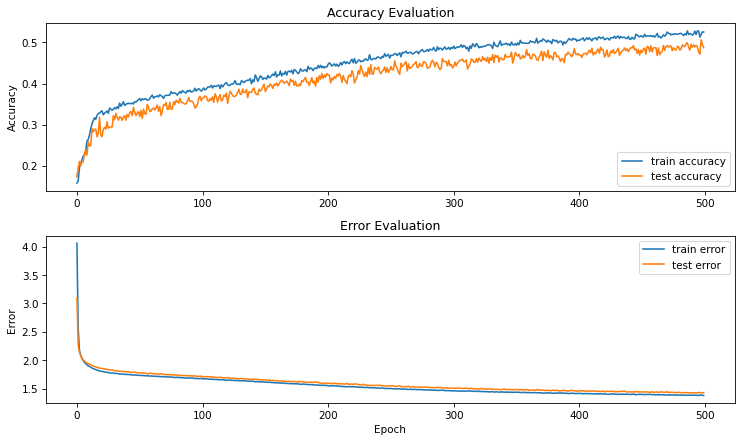


 Plots for Model  2


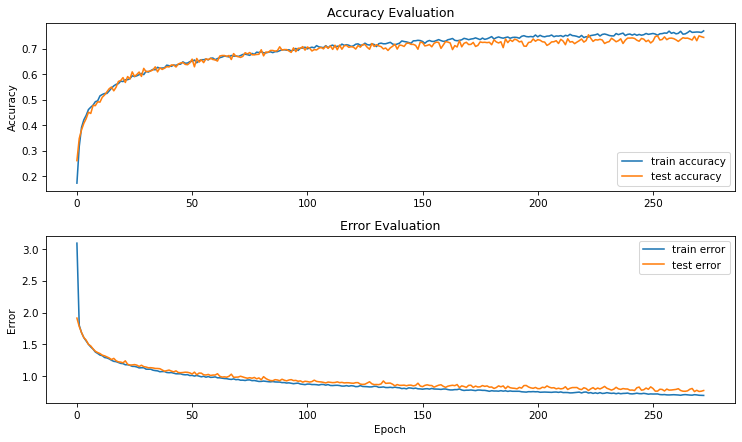


 Plots for Model  3


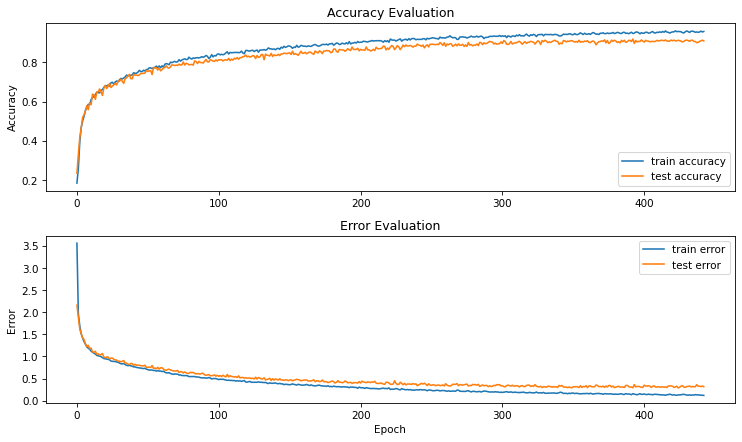


 Plots for Model  4


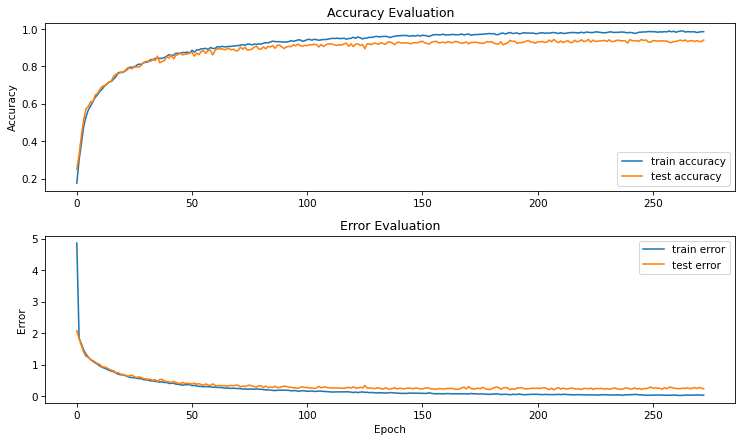

In [11]:
model.plot_all_histories()

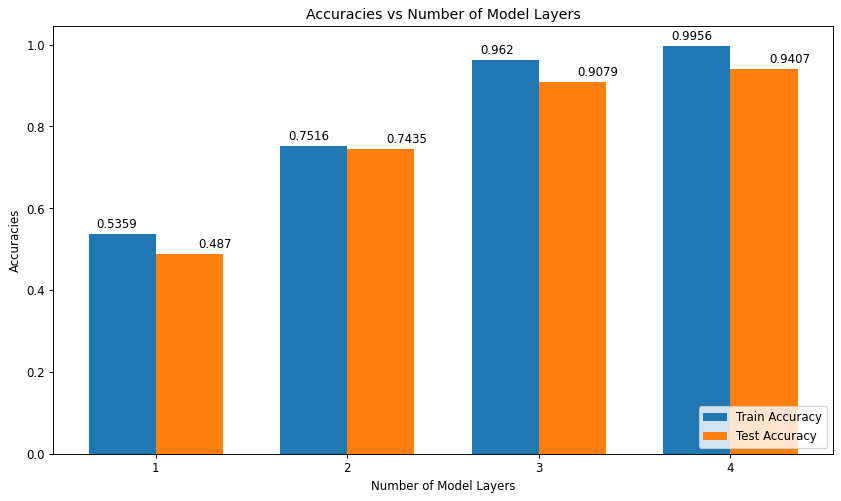

In [12]:
model.accuracies_vs_models()

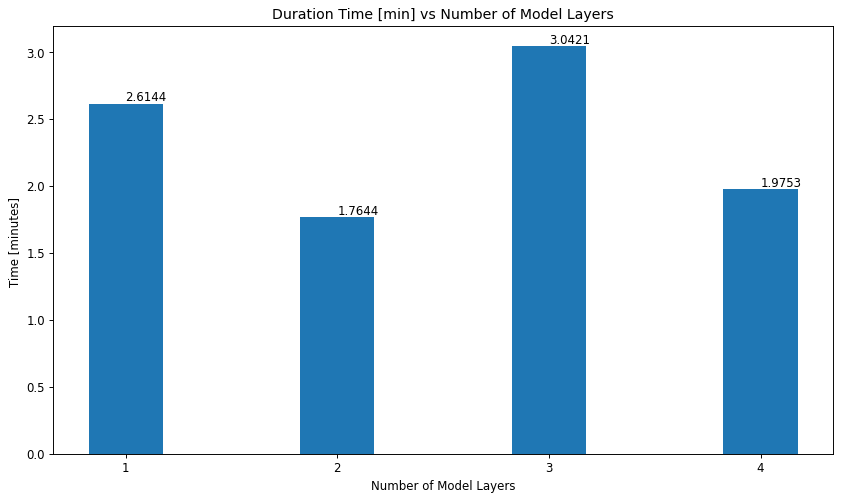

In [13]:
model.duration_vs_models()